## Final Project Submission

Please fill out:
* Student name: Omega Markos
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Pablo
* Blog post URL:


In [100]:
# import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


description of the column

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Data cleaning


Tidying data for analysis: check for missing, duplicate & extraneous value.

In [101]:
kchouse = pd.read_csv ("kc_house_data.csv" )
kchouse.info() # To have a general idea of the data such as data types, name & number of columns & missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [102]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [103]:
kchouse.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the info above we learn that there are substential missing values in the 'waterfront' & 'yr_renovated' columns and few missing values in the "view' column

In [104]:
kchouse.duplicated().sum() # checking for duplicateds

0

There are no duplicate values. 

In [8]:
# to check for extraneous values in the columns. 
# for col in kchouse.columns:
#     print (col,'\n', kchouse[col]. value_counts(normalize= True).head(), '\n\n')

On checking for extraneous data, It shows that 2.1% of the 'sqft_basement' is '?' and this needs to be fixed.

In [115]:
kchouse['yr_renovated'].mode()

0    0.0
dtype: float64

since the mode & median of the missing values is zero, missing values are replaced randomly.



In [8]:
# kchouse['yr_renovated'].fillna(lambda x:random.choice([ kchouse['yr_renovated'] != np.nan]['yr_renovated']), inplace =True)
# kchouse['waterfront'].fillna(lambda x:random.choice( [chouse['waterfront'] != np.nan]['waterfront']), inplace =True)
# kchouse['view'].fillna(lambda x:random.choice( [kchouse['view'] != np.nan]['view']), inplace =True)

In [106]:
kchouse.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [123]:
kcwaterfront_mode= kchouse['waterfront'].mode()
kchouse.waterfront= kchouse.waterfront.fillna(value=kcwaterfront_mode)

In [122]:
kcview_mode= kchouse['view'].mode()
kchouse.view= kchouse.view.fillna(value=kcview_mode)

In [121]:
kcyr_mode= kchouse['yr_renovated'].mode()
kchouse.yr_renovated= kchouse.yr_renovated.fillna(value=kcyr_mode)

In [124]:
kchouse.isna().sum() # to check missing value after replacing

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2375
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
hlong               0
dtype: int64

In [126]:
kchouse['date']= pd.to_datetime(kchouse['date'])
kchouse['hlong'] =pd.DataFrame
for yr in kchouse['yr_renovated']:
    if yr == 0:
        kchouse['hlong'] = 0
    else:
        kchouse['hlong']=(kchouse.date.dt.year)-(kchouse['yr_renovated'])
    
 # df['Review_length'] = df['Review_num_words'].map(lambda x: 'Short' if x < 50 else ('Medium' if x < 80 else 'Long'))   


In [86]:
#kchouse['hlong']= map(lambda x:(kchouse.date.dt.year)-kchouse['yr_renovated'], if x != 0 else =0) 

SyntaxError: invalid syntax (<ipython-input-86-ccd3a360a1d3>, line 1)

In [127]:
kchouse.hlong.value_counts(normalize=True)

0    1.0
Name: hlong, dtype: float64

# Explanatory Data Analysis


In [76]:
kchouse.describe() # checking summary of statistics of the data.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hlong
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19222.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007595,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,1930.686567
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086823,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,399.956974
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


The median sale price is 450k with the lowest 78k & highest 7.7 million. 

There is a big gap between the mean & the median price that is because the mean is affected by the few outliers in the data. 

More than 50% of the houses sold are 3 bedrooms and are graded 7. 

75% of the houses sold are not viewed. 

The oldest house was built in 1900 & the recent one is in 2015.

Asessing how the target variable 'price' behave in relation to the other variables.

In [53]:
 kchouse.yr_renovated.value_counts(normalize =True)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

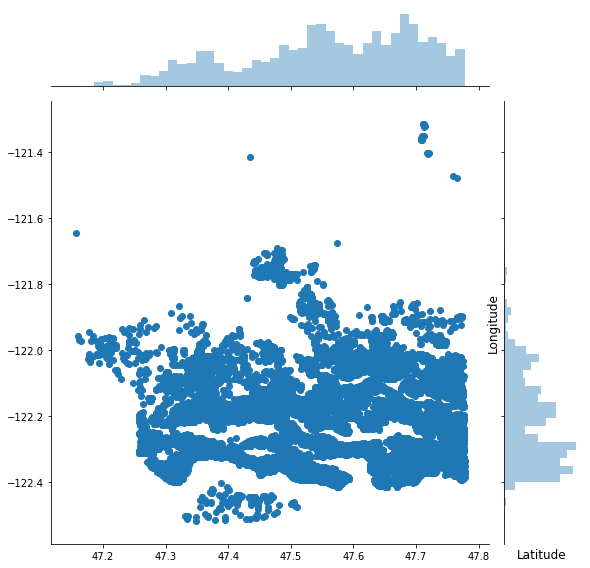

In [13]:
# kchouse.plot( kind='scatter', x= 'long', y= 'lat', alpha= 5.0, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
plt.figure(figsize=(8,8))
sns.jointplot(x= kchouse.lat.values, y= kchouse.long.values,size =8 )
plt.ylabel('Longitude' , fontsize =12)
plt.xlabel('Latitude' , fontsize =12)
plt.show()

 More houses are sold between latitude 47.5 to 47.8  and longitude of between -122 to-122.4

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

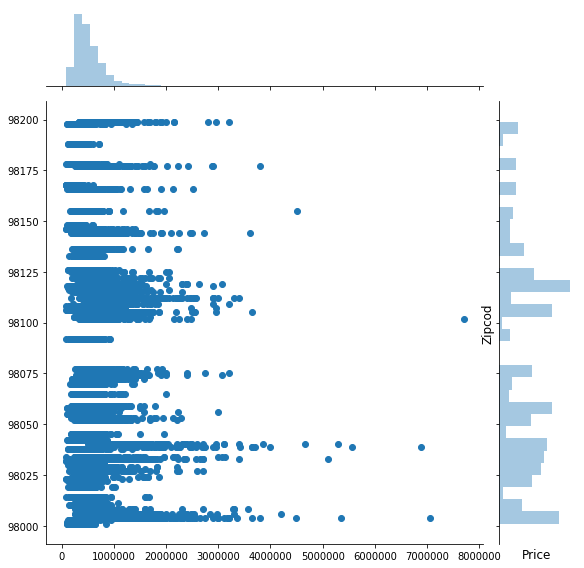

In [33]:
plt.figure(figsize=(8,8))
sns.jointplot(x= kchouse.price.values, y= kchouse.zipcode.values,size =8 )
plt.ylabel('Zipcod' , fontsize =12)
plt.xlabel('Price' , fontsize =12)
plt.show()

The neighborhoods between zipcodes 98100 & 98125 looks like an ideal location. A lot of houses were sold there & the highest sale price is there as well.

In [60]:
kchouse['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64

In [14]:
bins= [98000,98033, 98065, 98118,98199]
bins_zipcode = pd.cut(kchouse['zipcode'], bins)
bins_zipcode=bins_zipcode.cat.as_unordered()
bins_zipcode.head()

0    (98118, 98199]
1    (98118, 98199]
2    (98000, 98033]
3    (98118, 98199]
4    (98065, 98118]
Name: zipcode, dtype: category
Categories (4, interval[int64]): [(98000, 98033], (98033, 98065], (98065, 98118], (98118, 98199]]

In [15]:
kchouse['zipcode']=bins_zipcode

In [16]:
kchouse['zipcode']=kchouse['zipcode'].cat.codes 

In [17]:
zipcode_dummy= pd.get_dummies(bins_zipcode, prefix= 'zipcode')

In [18]:
kchouse= kchouse.drop(['zipcode'], axis =1)

In [19]:
kchouse=pd.concat([kchouse,zipcode_dummy],axis=1)


In [80]:
kchouse['view']=kchouse['view'].astype('category')
kchouse['view']=kchouse['view'].cat.codes 
view_dummy= pd.get_dummies(kchouse['view'], prefix= 'view')
kchouse= kchouse.drop(['view'], axis =1)
kchouse=pd.concat([kchouse,view_dummy],axis=1)

In [81]:
kchouse['waterfront']=kchouse['waterfront'].astype('category')
kchouse['waterfront']=kchouse['waterfront'].cat.codes 
wf_dummy= pd.get_dummies(kchouse['waterfront'], prefix= 'waterfront')
kchouse= kchouse.drop(['waterfront'], axis =1)
kchouse=pd.concat([kchouse,wf_dummy],axis=1)

In [82]:
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,hlong,view_0,view_1,view_2,view_3,view_4,view_5,waterfront_-1,waterfront_0,waterfront_1
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,...,2014.0,0,1,0,0,0,0,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,...,23.0,0,1,0,0,0,0,0,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,...,NaN,0,1,0,0,0,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,...,2014.0,0,1,0,0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,...,2015.0,0,1,0,0,0,0,0,1,0


In [15]:
kchouse.groupby('bedrooms').median().price

bedrooms
1     299000.0
2     374000.0
3     413000.0
4     549997.5
5     620000.0
6     650000.0
7     728580.0
8     700000.0
9     817000.0
10    660000.0
11    520000.0
33    640000.0
Name: price, dtype: float64

In [16]:
kchouse.groupby('bedrooms').count()[['id']]

,id
bedrooms,
1,196
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13
9,6


3 bedroom house are the most popular homes followed by 4 bedrooms. and it is very intereseting to find 33 bedroom house with a median price of 640k. We need to look further into the data if this is a data entry error. 

In [17]:

kchouse.groupby(kchouse['date'].dt.year).count()[['id']]

,id
date,
2014,14622
2015,6975


A total of 21597 sold in both years. The number of houses sold reducedy by more than 50% in 2015.

In [18]:
kchouse.groupby(kchouse.date.dt.month).count()[['id']]

,id
date,
1,978
2,1247
3,1875
4,2229
5,2414
6,2178
7,2211
8,1939
9,1771


January is the slowest month and a lot of houses are sold between April to July.

In [83]:
kchouse.groupby(kchouse['yr_renovated']).median().price

yr_renovated
0.0        447500.0
1934.0     459950.0
1940.0     378400.0
1944.0     521000.0
1945.0     375000.0
1946.0     550000.0
1948.0     410000.0
1950.0     152900.0
1951.0     276000.0
1953.0     247500.0
1954.0     900000.0
1955.0     399000.0
1956.0    1140000.0
1957.0     312350.0
1958.0     397380.0
1959.0     397500.0
1960.0     203700.0
1962.0     615000.0
1963.0     402500.0
1964.0     325000.0
1965.0     623500.0
1967.0     268600.0
1968.0     400000.0
1969.0     555750.0
1970.0     450000.0
1971.0     451555.0
1972.0     512500.0
1973.0     430000.0
1974.0     448750.0
1975.0     596000.0
            ...    
1986.0     506000.0
1987.0     674000.0
1988.0     588000.0
1989.0     560000.0
1990.0     750000.0
1991.0     741500.0
1992.0     538000.0
1993.0     699975.0
1994.0     640002.0
1995.0     674500.0
1996.0     649950.0
1997.0     523225.0
1998.0     518000.0
1999.0     840000.0
2000.0     770000.0
2001.0     745000.0
2002.0     880000.0
2003.0     765000.0
2004.0 

The expensive houses tend to get viewed more.

In [32]:
kchouse.groupby('condition').median().price

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64

# Identifying Catagorical variables & transformation

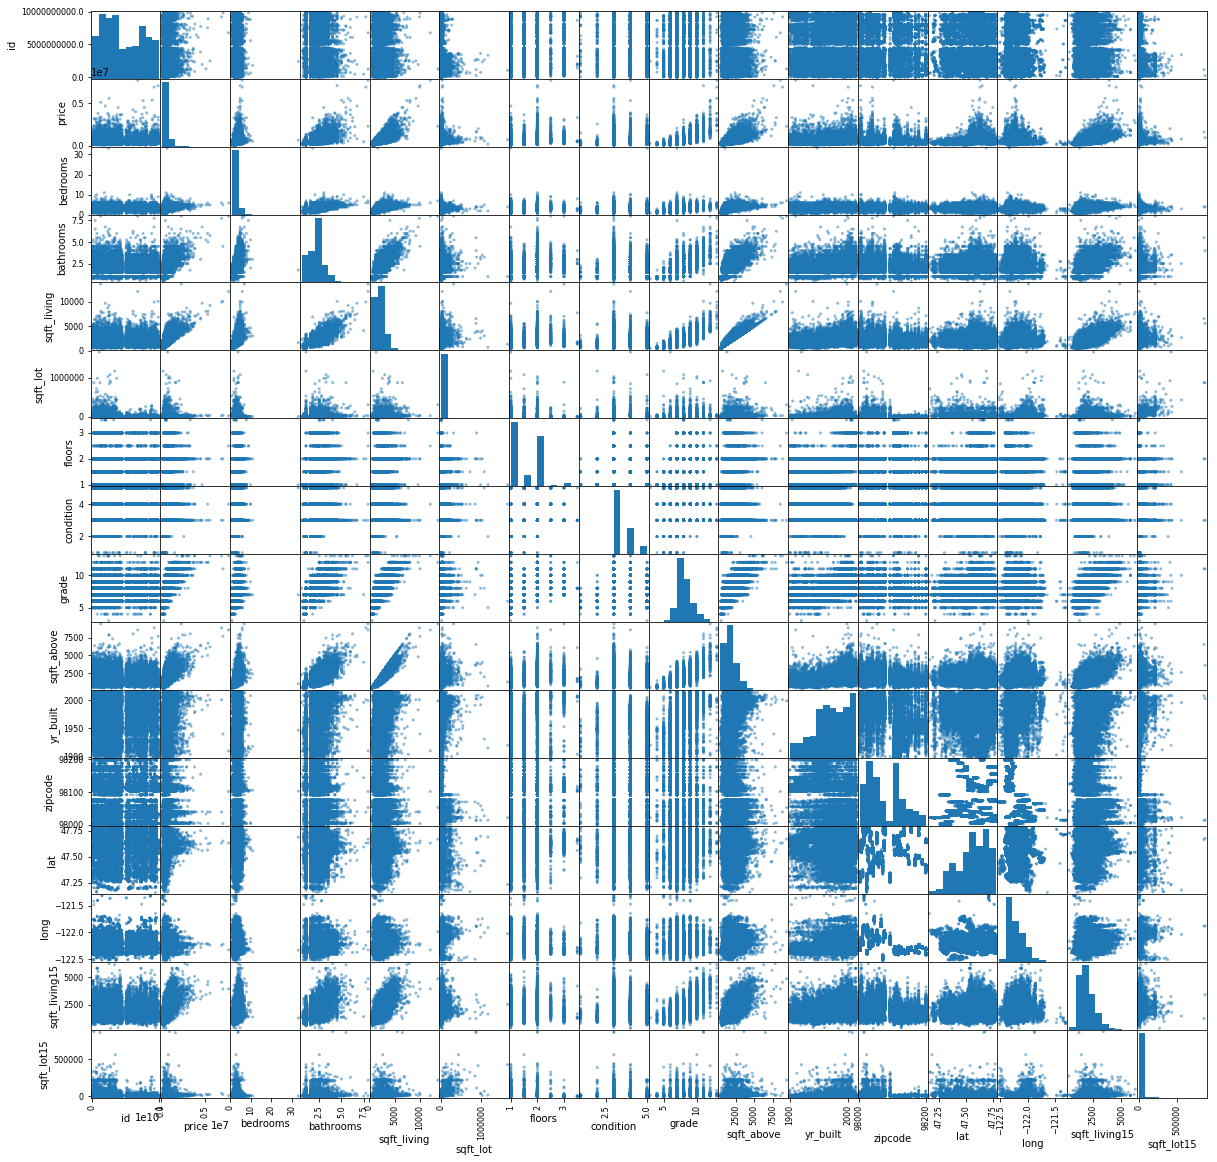

In [19]:
 pd.plotting.scatter_matrix(kchouse,figsize=[20,20]);

From the metrix above we learn that grade ,condition, floors ,water front  & view are catagorical variable.

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


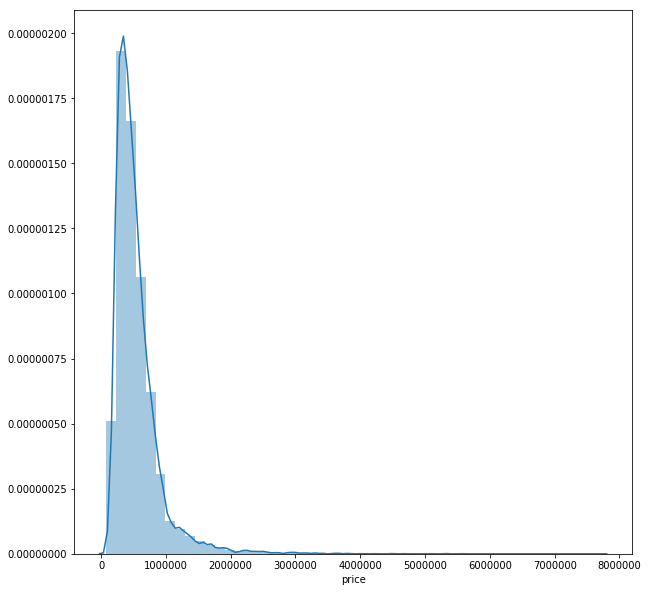

In [94]:
fig, ax = plt.subplots(figsize = (10, 10)) # to make the plot bigger
ax= sns.distplot(kchouse.price) #  distribution plot to checking the distribution of the target variable 'price'.

Sale price is a little skewed to the left with few outliers.

#  Checking for correlation

In [128]:
abs(kchouse.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hlong
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


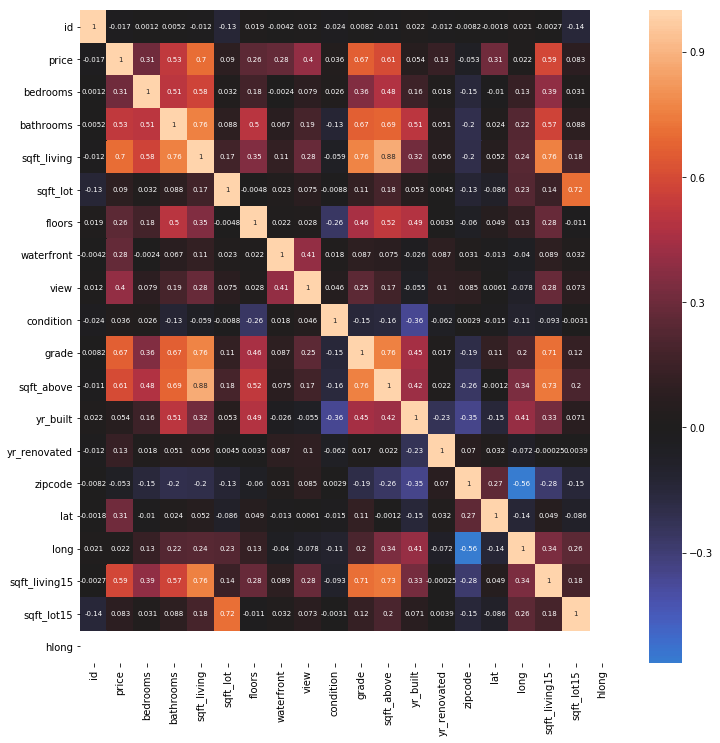

In [129]:
fig, ax = plt.subplots(figsize = (12, 12)) # to make the heatmap bigger
sns.heatmap(kchouse.corr(),center=0, annot=True, annot_kws={"size":7});

In [93]:
kchouse_corr = kchouse.corr()
kchouse_corr["price"].sort_values(ascending=False) #to check the correlation between price & the other variables only

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

From the correlation table & the heat map, we can learn that there is a sttong positive correletion betwen the sale price and number of bathrooms. grade, square feet above the basement, square feet of living. Sqft_living being the highest.    

# checking for 

In [27]:
# from statsmodels.formula.api import ols
# pre_cols = ['bathrooms','sqft_living','grade','sqft_above','sqft_living15']
# check the distribution of the predictors using scatter matrix
# pd.plotting.scatter_matrix(kchouse[pre_cols],figsize=[20,20]); 

Except grade all the predictors are not normally dsistributed. Normal distribution of the feature variables is not mandatort but will help to improve our model so transformation will be ideal.

# Applying Transformations  to predictors with non-normal distribution

In [26]:
# data_log = pd.DataFrame([])
# data_log['bathrooms'] = kchouse['bathrooms'] # the log transormation make the distribution worest 
# data_log['sqft_living'] = np.log(kchouse['sqft_living'])
# data_log['sqft_above'] = np.log(kchouse['sqft_above'])
# data_log['sqft_living15'] = np.log(kchouse['sqft_living15'])
# data_log['grade'] = kchouse['grade']
# data_log.hist(figsize  = [6, 6]);###



In [47]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = '+'.join(data_log)
formula = outcome + '~' + predictors
model =ols(formula=formula, data=kchouse).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     5331.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:06:27   Log-Likelihood:            -3.0141e+05
No. Observations:               21597   AIC:                         6.028e+05
Df Residuals:                   21593   BIC:                         6.029e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.568e+05   6465.687    -24.254      0.000   -1.69e+05   -1.44e+05
bathrooms       8.25e+04   3421.451     24.113      0.000    7.58e+04    8.92e+04
sqft_above      124.7224      3.832     32.546      0.000     117.211     132.234
sqft_living15   150.7471      4.096     36.808      0.000     142.720     158.775
==============================================================================
Omnibus:                    17636.233   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1114911.564
Skew:                           3.498   Prob(JB):                         0.00
Kurtosis:                      37.497   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
import statsmodels.api as sm
predictors_int =sm.add_constant(data_log)
model = sm.OLS(kchouse['price'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     4321.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:19:13   Log-Likelihood:            -3.0231e+05
No. Observations:               21597   AIC:                         6.046e+05
Df Residuals:                   21593   BIC:                         6.047e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.173e+06   5.48e+04    -57.869      0.000   -3.28e+06   -3.07e+06
bathrooms      1.177e+05   3619.338     32.507      0.000    1.11e+05    1.25e+05
sqft_above     1.469e+05   7625.076     19.260      0.000    1.32e+05    1.62e+05
sqft_living15  3.155e+05   8706.981     36.237      0.000    2.98e+05    3.33e+05
==============================================================================
Omnibus:                    18870.596   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1479136.239
Skew:                           3.831   Prob(JB):                         0.00
Kurtosis:                      42.812   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""